In [5]:
from sklearn.model_selection import train_test_split
import category_encoders as ce
import numpy as np
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import folium
import matplotlib.pyplot as plt

In [11]:
df_adult_new = pd.read_excel('Undersampled_Model.xlsx')
df_adult = pd.read_excel('Cleaned_Census_Data.xlsx')


df_model=df_adult_new.drop(columns=['relationship','fnlwgt','race','capital_gain','capital_loss'])

In [3]:
X = df_model.drop(['income'], axis=1)

y = df_model['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


encoder = ce.OrdinalEncoder(cols=['workclass', 'education','nativecountry','occupation','marital_status','sex'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)


In [4]:
joblib.dump(clf, "rf_model.sav")

['rf_model.sav']

In [20]:
accuracy

0.7909113796576033

In [3]:
nativecountry_counts = df_adult_new['nativecountry'].value_counts()
nativecountry_counts

nativecountry
United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador       

In [7]:
income_counts = df_adult_new['income'].value_counts()
income_counts

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [6]:
us_income_counts = df_adult_new[df_adult_new['nativecountry'] == 'United-States']['income'].value_counts()
us_income_counts

income
<=50K    33775
>50K     10914
Name: count, dtype: int64

In [8]:
Under50 = df_adult_new[df_adult_new['income'] == '<=50K']
Over50 = df_adult_new[df_adult_new['income'] == '>50K']

Undersampled = Under50.sample(frac=1/3, random_state=42)

NewUndersampled = pd.concat([Undersampled, Over50])

NewUndersampled.reset_index(drop=True, inplace=True)

In [9]:
income_counts = NewUndersampled['income'].value_counts()
income_counts

income
<=50K    12385
>50K     11687
Name: count, dtype: int64

In [11]:
NewUndersampled.to_excel("Undersampled_Model.xlsx",sheet_name = "Census",index=False)

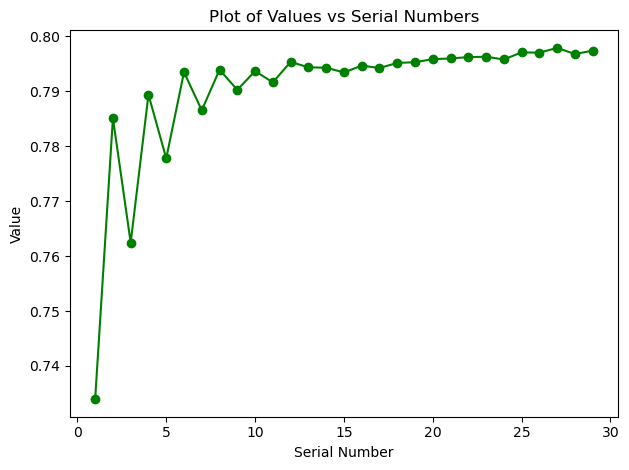

In [24]:
df_knn = pd.read_csv("MeanAccKNN.csv")

values = df_knn['Value']
serial_numbers = df_knn['Serial Number']

plt.plot(serial_numbers, values, 'g', marker='o')
plt.xlabel('Serial Number')
plt.ylabel('Value')
plt.title('Plot of Values vs Serial Numbers')
plt.tight_layout()
plt.show()

In [26]:
X

,age,workclass,education,marital_status,occupation,sex,hours_per_week,nativecountry,CG_Category
0,28,Private,3,Divorced,Machine-op-inspct,Female,25,United-States,0
1,44,Private,3,Separated,Adm-clerical,Female,38,United-States,0
2,24,Private,3,Married-civ-spouse,Adm-clerical,Female,30,United-States,0
3,18,Private,3,Never-married,Other-service,Male,20,United-States,0
4,44,Private,2,Married-civ-spouse,Sales,Male,60,United-States,0
...,...,...,...,...,...,...,...,...,...
24067,38,Private,7,Married-civ-spouse,Prof-specialty,Male,50,United-States,0
24068,43,Local-gov,7,Married-civ-spouse,Exec-managerial,Male,50,United-States,0
24069,40,Private,5,Married-civ-spouse,Prof-specialty,Male,55,United-States,1
24070,50,Local-gov,7,Married-civ-spouse,Prof-specialty,Female,40,United-States,0
